In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
import numpy as np

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
labels_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)

In [ ]:
#mlp
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
#cnn
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
#mlp method 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
net = Sequential()
net.add(Dense(800, activation='relu', input_shape=(784,)))
net.add(Dense(400, activation='relu'))
net.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input

#cnn method 1
net = Sequential()
net.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu',
input_shape=(28,28,1)))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPool2D(pool_size=(2, 2)))
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dropout(rate=0.5))
net.add(Dense(10, activation='softmax'))

In [ ]:
#method 2 mlp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
input_img = Input(shape=(784,)) # define a placeholder for the input data
x = Dense(800, activation='relu')(input_img)
y = Dense(400, activation='relu')(x)
z = Dense(10, activation='softmax')(y)
net = Model(input_img, z)

In [ ]:
#method 2 mlp 2 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers.merge import concatenate
input_img = Input(shape=(784,)) # define a placeholder for the input data
x = Dense(800, activation='relu')(input_img)
y1= Dense(100, activation='tanh')(x)
y2= Dense(200, activation='relu')(x)
y = concatenate([y1, y2])
z = Dense(10, activation='softmax')(y)
net = Model(input_img, z)

ModuleNotFoundError: ignored

In [ ]:
#cnn method 2 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
inputs = Input(shape=x_train.shape[1:])
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
outputs = Dense(10, activation='softmax')(x)
net = Model(inputs=inputs, outputs=outputs)

In [ ]:
#new method
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input


In [ ]:
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))
    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input

net = Sequential()

net.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
net.add(BatchNormalization())
net.add(Conv2D(32, kernel_size = 3, activation='relu'))
net.add(BatchNormalization())
net.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.4))

net.add(Conv2D(64, kernel_size = 3, activation='relu'))
net.add(BatchNormalization())
net.add(Conv2D(64, kernel_size = 3, activation='relu'))
net.add(BatchNormalization())
net.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.4))

net.add(Conv2D(128, kernel_size = 4, activation='relu'))
net.add(BatchNormalization())
net.add(Flatten())
net.add(Dropout(0.4))
net.add(Dense(10, activation='softmax'))
# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
net.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 12, 32)       1

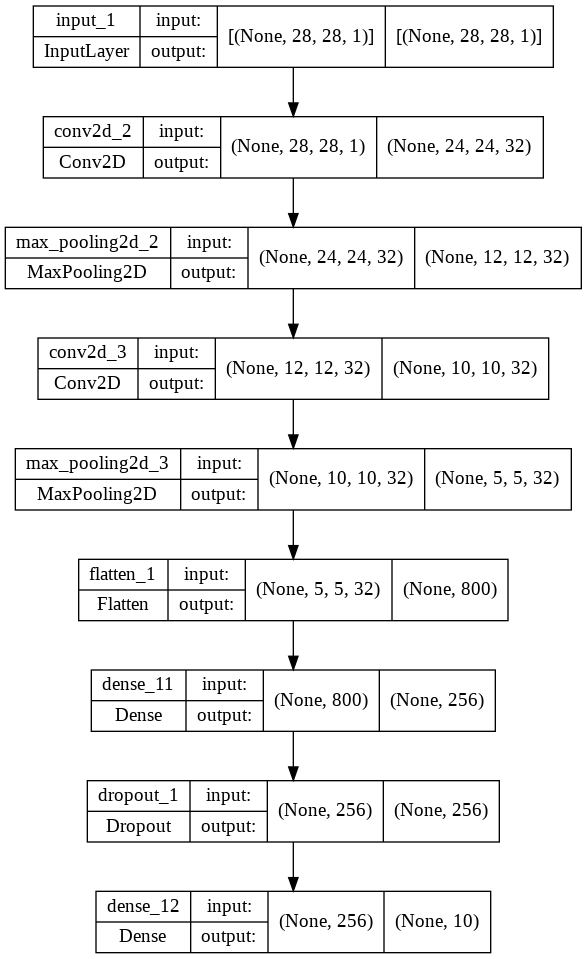

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(net, to_file='network_structure.png', show_shapes=True)

In [ ]:
net.compile(loss='categorical_crossentropy', optimizer='adam')
history = net.fit(x_train, y_train,
validation_data=(x_test, y_test),
 epochs=20,
 batch_size=256)

Epoch 1/20
235/235 [==============================] - 239s 1s/step - loss: 0.2951 - val_loss: 1.4250
Epoch 2/20
235/235 [==============================] - 237s 1s/step - loss: 0.0720 - val_loss: 0.0661
Epoch 3/20
235/235 [==============================] - 236s 1s/step - loss: 0.0521 - val_loss: 0.0223
Epoch 4/20
235/235 [==============================] - 237s 1s/step - loss: 0.0419 - val_loss: 0.0232
Epoch 5/20
235/235 [==============================] - 236s 1s/step - loss: 0.0359 - val_loss: 0.0235
Epoch 6/20
235/235 [==============================] - 236s 1s/step - loss: 0.0302 - val_loss: 0.0193
Epoch 7/20
235/235 [==============================] - 236s 1s/step - loss: 0.0291 - val_loss: 0.0195
Epoch 8/20
235/235 [==============================] - 241s 1s/step - loss: 0.0268 - val_loss: 0.0189
Epoch 9/20
235/235 [==============================] - 237s 1s/step - loss: 0.0242 - val_loss: 0.0182
Epoch 10/20
235/235 [==============================] - 237s 1s/step - loss: 0.0225 - val_lo

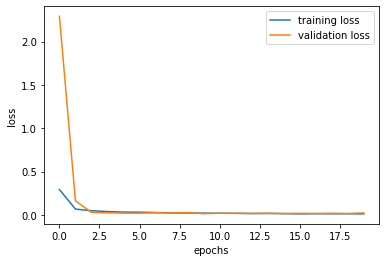

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
#A trained network can be saved to disk using:
net.save("network_for_mnist.h5")


In [ ]:
#A saved model can be reloaded using:
from tensorflow.keras.models import load_model
net=load_model("network_for_mnist.h5")


In [ ]:
outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
misclassified=sum(labels_predicted!=labels_test)
print('Percentage misclassified = ',100*misclassified/labels_test.size)



Percentage misclassified =  0.61


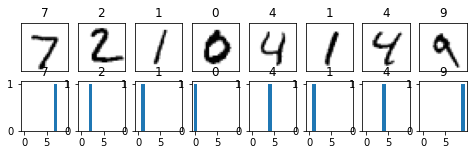

In [ ]:
plt.figure(figsize=(8, 2))
for i in range(0,8):
 ax=plt.subplot(2,8,i+1)
 plt.imshow(x_test[i,:].reshape(28,28), cmap=plt.get_cmap('gray_r'))
 plt.title(labels_test[i])
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
for i in range(0,8):
    #output = net.predict(x_test[i,:].reshape(1, 784)) #if MLP
    output = net.predict(x_test[i,:].reshape(1, 28,28,1)) #if CNN
    output=output[0,0:]
    plt.subplot(2,8,8+i+1)
    plt.bar(np.arange(10.),output)
    plt.title(np.argmax(output))

In [ ]:
import numpy as np
import os
from tensorflow.keras.models import load_model
#load .h5 file of arbitrary name for testing (last if more than one)
print(os.getcwd())
for file in os.listdir(os.getcwd()):
 if file.endswith(".h5"):
    print(file)
    net=load_model(file)
net.summary()
#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
 netType='CNN'
else:
 netType='MLP'
#test with MNIST data
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
if netType in ['MLP']:
 x_test = x_test.reshape(10000, 784)
else:
 x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

 outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST=',100*correct_classified/labels_test.size)

/content
network_for_mnist.h5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Ba